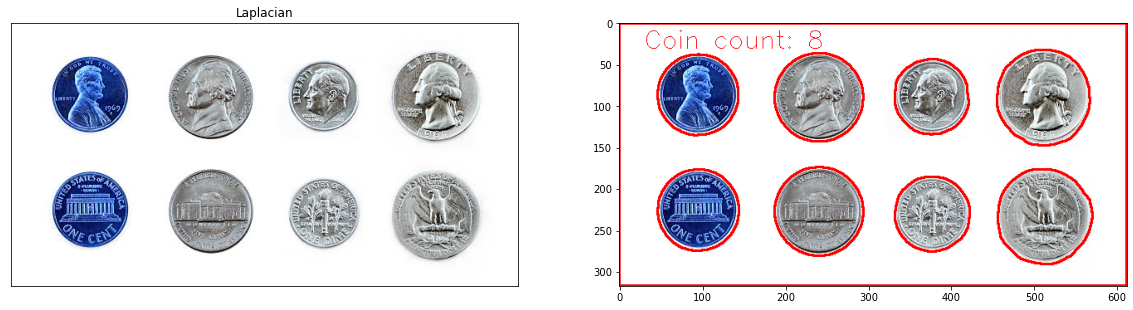

In [241]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

count = 0
im = cv2.imread('coin4.jpg')
#im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(7,7),0)
ret, thresh = cv2.threshold(imgray,245,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(thresh,kernel,iterations = 1)
#dilation = cv2.dilate(thresh,kernel,iterations = 1)
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
 
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

cnt = contours[0]
M = cv2.moments(cnt)
#print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))
#print(size)

area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

img0 = im.copy()
img1 = im.copy()

img0 = cv2.drawContours(img0, contours, 1, (255,0,0), 2)
img1 = cv2.drawContours(img1, contours, -1, (255,0,0), 2)


#cx = int(M['m10']/M['m00'])
#cy = int(M['m01']/M['m00'])
#print(M)


#img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(255,255,255),2)

for i in range(len(size)):
    if 100 <= size[i][1]:
        count += 1

blue = (255,0,0)
font = cv2.FONT_HERSHEY_SIMPLEX
p_str = "Coin count: %d" %count
img1 = cv2.putText(img1, p_str, (30,30), font, 1, blue)

plt.figure(figsize=(20,20))
plt.subplot(221),plt.imshow(im)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img1,cmap = 'gray')

plt.show()